In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import datetime
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.options.display.max_columns = None

# Reading datasets

## Eruptions

In [3]:
eruptions=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")

In [4]:
eruptions.head()

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
0,266030,Soputan,22354,Confirmed Eruption,NaN,NaN,2020.0,3.0,23.0,Historical Observations,2020.0,4.0,2.0,1.112,124.737
1,343100,San Miguel,22355,Confirmed Eruption,NaN,NaN,2020.0,2.0,22.0,Historical Observations,2020.0,2.0,22.0,13.434,-88.269
2,233020,"Fournaise, Piton de la",22343,Confirmed Eruption,NaN,NaN,2020.0,2.0,10.0,Historical Observations,2020.0,4.0,6.0,-21.244,55.708
3,345020,Rincon de la Vieja,22346,Confirmed Eruption,NaN,NaN,2020.0,1.0,31.0,Historical Observations,2020.0,4.0,17.0,10.830,-85.324
4,353010,Fernandina,22347,Confirmed Eruption,NaN,NaN,2020.0,1.0,12.0,Historical Observations,2020.0,1.0,12.0,-0.370,-91.550


In [5]:
eruptions.shape

(11178, 15)

In [6]:
eruptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11178 entries, 0 to 11177
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   volcano_number          11178 non-null  int64  
 1   volcano_name            11178 non-null  object 
 2   eruption_number         11178 non-null  int64  
 3   eruption_category       11178 non-null  object 
 4   area_of_activity        4694 non-null   object 
 5   vei                     8272 non-null   float64
 6   start_year              11177 non-null  float64
 7   start_month             10985 non-null  float64
 8   start_day               10982 non-null  float64
 9   evidence_method_dating  9898 non-null   object 
 10  end_year                4332 non-null   float64
 11  end_month               4329 non-null   float64
 12  end_day                 4326 non-null   float64
 13  latitude                11178 non-null  float64
 14  longitude               11178 non-null

## Volcanoes

In [7]:
volcanoes=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/volcano.csv")

In [8]:
volcanoes.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,tectonic_settings,evidence_category,major_rock_1,major_rock_2,major_rock_3,major_rock_4,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,Dacite,,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,Subduction zone / Continental crust (>25 km),Evidence Credible,Dacite,Andesite / Basaltic Andesite,,,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,Subduction zone / Continental crust (>25 km),Eruption Observed,Andesite / Basaltic Andesite,Dacite,,,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,Intraplate / Continental crust (>25 km),Eruption Dated,Rhyolite,Dacite,Basalt / Picro-Basalt,Andesite / Basaltic Andesite,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,Subduction zone / Continental crust (>25 km),Eruption Dated,Andesite / Basaltic Andesite,Basalt / Picro-Basalt,,,,Dacite,,,,,0,70,4019,393303


## Earthquakes

In [9]:
response=requests.get("https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1929-01-01&endtime=2010-12-31&minmagnitude=2&maxlatitude=-36&minlatitude=-43&minlongitude=-75&maxlongitude=-67")
response

<Response [200]>

In [10]:
villarrica_earthquakes=pd.DataFrame(response.json()['features'])

In [11]:
villarrica_earthquakes.head()

,type,properties,geometry,id
0,Feature,"{'mag': 4, 'place': 'Golfo de Ancud, Los Lagos...","{'type': 'Point', 'coordinates': [-73.333, -42...",usp000hrgh
1,Feature,"{'mag': 4.5, 'place': 'offshore Bio-Bio, Chile...","{'type': 'Point', 'coordinates': [-73.235, -36...",usp000hr5d
2,Feature,"{'mag': 4.3, 'place': 'offshore Bio-Bio, Chile...","{'type': 'Point', 'coordinates': [-73.726, -37...",usp000hr1v
3,Feature,"{'mag': 4.5, 'place': 'Los Lagos, Chile', 'tim...","{'type': 'Point', 'coordinates': [-72.108, -40...",usp000hqxc
4,Feature,"{'mag': 4.7, 'place': 'offshore Bio-Bio, Chile...","{'type': 'Point', 'coordinates': [-73.529, -37...",usp000hqtn


In [12]:
villarrica_earthquakes['url']=villarrica_earthquakes['properties'].apply(lambda x: x['url'])

In [13]:
villarrica_earthquakes['mag']=[x['mag'] for x in villarrica_earthquakes['properties']]

In [14]:
villarrica_earthquakes['longitude']=[x['coordinates'][0] for x in villarrica_earthquakes['geometry']]

In [15]:
villarrica_earthquakes['latitude']=[x['coordinates'][1] for x in villarrica_earthquakes['geometry']]

In [16]:
villarrica_earthquakes['time']=[x['time'] for x in villarrica_earthquakes['properties']]

In [28]:
villarrica_earthquakes['url']

0       https://earthquake.usgs.gov/earthquakes/eventp...
1       https://earthquake.usgs.gov/earthquakes/eventp...
2       https://earthquake.usgs.gov/earthquakes/eventp...
3       https://earthquake.usgs.gov/earthquakes/eventp...
4       https://earthquake.usgs.gov/earthquakes/eventp...
                              ...                        
1727    https://earthquake.usgs.gov/earthquakes/eventp...
1728    https://earthquake.usgs.gov/earthquakes/eventp...
1729    https://earthquake.usgs.gov/earthquakes/eventp...
1730    https://earthquake.usgs.gov/earthquakes/eventp...
1731    https://earthquake.usgs.gov/earthquakes/eventp...
Name: url, Length: 1732, dtype: object

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument('--headless')
driver = webdriver.Chrome()
driver.set_page_load_timeout(30)
driver.get(villarrica_earthquakes['url'][5])
print(BeautifulSoup(driver.page_source).find_all('ul',attrs={'class':'ng-star-inserted'})[0].text[0:10])
driver.close()

AttributeError: 'NoneType' object has no attribute 'get'

In [29]:
date=[]
driver = webdriver.Chrome()
for url in tqdm(villarrica_earthquakes['url']):
    driver.get(url)
    time.sleep(6)
    driver.page_source
    date.append(BeautifulSoup(driver.page_source).find_all('ul',attrs={'class':'ng-star-inserted'})[0].text[0:10])
driver.close()



  0%|                                                                                         | 0/1732 [00:00<?, ?it/s]

  0%|                                                                               | 1/1732 [00:08<4:00:31,  8.34s/it]

  0%|                                                                               | 2/1732 [00:14<3:44:39,  7.79s/it]

  0%|▏                                                                              | 3/1732 [00:21<3:32:32,  7.38s/it]

  0%|▏                                                                              | 4/1732 [00:27<3:24:42,  7.11s/it]

  0%|▏                                                                              | 5/1732 [00:34<3:18:48,  6.91s/it]

  0%|▎                                                                              | 6/1732 [00:41<3:18:40,  6.91s/it]

  0%|▎                                                                              | 7/1732 [00:47<3:17:35,  6.87s/it]

  0%|▎                        

  8%|█████▉                                                                       | 134/1732 [15:43<3:02:25,  6.85s/it]

  8%|██████                                                                       | 135/1732 [15:50<3:02:48,  6.87s/it]

  8%|██████                                                                       | 136/1732 [15:57<3:02:25,  6.86s/it]

  8%|██████                                                                       | 137/1732 [16:03<3:02:34,  6.87s/it]

  8%|██████▏                                                                      | 138/1732 [16:10<3:02:05,  6.85s/it]

  8%|██████▏                                                                      | 139/1732 [16:17<3:01:43,  6.84s/it]

  8%|██████▏                                                                      | 140/1732 [16:24<3:01:10,  6.83s/it]

  8%|██████▎                                                                      | 141/1732 [16:31<3:01:46,  6.86s/it]

  8%|██████▎                    

 15%|███████████▉                                                                 | 268/1732 [31:29<2:47:56,  6.88s/it]

 16%|███████████▉                                                                 | 269/1732 [31:36<2:48:07,  6.90s/it]

 16%|████████████                                                                 | 270/1732 [31:43<2:47:32,  6.88s/it]

 16%|████████████                                                                 | 271/1732 [31:50<2:46:51,  6.85s/it]

 16%|████████████                                                                 | 272/1732 [31:57<2:46:23,  6.84s/it]

 16%|████████████▏                                                                | 273/1732 [32:04<2:45:51,  6.82s/it]

 16%|████████████▏                                                                | 274/1732 [32:10<2:45:59,  6.83s/it]

 16%|████████████▏                                                                | 275/1732 [32:17<2:46:11,  6.84s/it]

 16%|████████████▎              

 23%|█████████████████▊                                                           | 402/1732 [46:59<2:33:24,  6.92s/it]

 23%|█████████████████▉                                                           | 403/1732 [47:06<2:32:31,  6.89s/it]

 23%|█████████████████▉                                                           | 404/1732 [47:13<2:33:40,  6.94s/it]

 23%|██████████████████                                                           | 405/1732 [47:20<2:32:33,  6.90s/it]

 23%|██████████████████                                                           | 406/1732 [47:26<2:32:31,  6.90s/it]

 23%|██████████████████                                                           | 407/1732 [47:33<2:31:53,  6.88s/it]

 24%|██████████████████▏                                                          | 408/1732 [47:40<2:32:07,  6.89s/it]

 24%|██████████████████▏                                                          | 409/1732 [47:47<2:31:38,  6.88s/it]

 24%|██████████████████▏        

 31%|███████████████████████▏                                                   | 536/1732 [1:02:32<2:17:55,  6.92s/it]

 31%|███████████████████████▎                                                   | 537/1732 [1:02:39<2:17:32,  6.91s/it]

 31%|███████████████████████▎                                                   | 538/1732 [1:02:45<2:17:58,  6.93s/it]

 31%|███████████████████████▎                                                   | 539/1732 [1:02:52<2:17:30,  6.92s/it]

 31%|███████████████████████▍                                                   | 540/1732 [1:02:59<2:17:01,  6.90s/it]

 31%|███████████████████████▍                                                   | 541/1732 [1:03:06<2:16:35,  6.88s/it]

 31%|███████████████████████▍                                                   | 542/1732 [1:03:13<2:16:34,  6.89s/it]

 31%|███████████████████████▌                                                   | 543/1732 [1:03:20<2:16:14,  6.87s/it]

 31%|███████████████████████▌   

 39%|█████████████████████████████                                              | 670/1732 [1:18:03<2:01:16,  6.85s/it]

 39%|█████████████████████████████                                              | 671/1732 [1:18:10<2:01:07,  6.85s/it]

 39%|█████████████████████████████                                              | 672/1732 [1:18:16<2:01:03,  6.85s/it]

 39%|█████████████████████████████▏                                             | 673/1732 [1:18:27<2:20:56,  7.99s/it]

 39%|█████████████████████████████▏                                             | 674/1732 [1:18:34<2:15:25,  7.68s/it]

 39%|█████████████████████████████▏                                             | 675/1732 [1:18:41<2:11:47,  7.48s/it]

 39%|█████████████████████████████▎                                             | 676/1732 [1:18:48<2:08:21,  7.29s/it]

 39%|█████████████████████████████▎                                             | 677/1732 [1:18:55<2:06:42,  7.21s/it]

 39%|███████████████████████████

 46%|██████████████████████████████████▊                                        | 804/1732 [1:33:41<1:45:44,  6.84s/it]

 46%|██████████████████████████████████▊                                        | 805/1732 [1:33:51<1:59:58,  7.77s/it]

 47%|██████████████████████████████████▉                                        | 806/1732 [1:33:58<1:55:23,  7.48s/it]

 47%|██████████████████████████████████▉                                        | 807/1732 [1:34:04<1:52:06,  7.27s/it]

 47%|██████████████████████████████████▉                                        | 808/1732 [1:34:11<1:49:46,  7.13s/it]

 47%|███████████████████████████████████                                        | 809/1732 [1:34:20<1:57:13,  7.62s/it]

 47%|███████████████████████████████████                                        | 810/1732 [1:34:27<1:53:33,  7.39s/it]

 47%|███████████████████████████████████                                        | 811/1732 [1:34:34<1:50:33,  7.20s/it]

 47%|███████████████████████████

 54%|████████████████████████████████████████▌                                  | 938/1732 [1:49:21<1:31:14,  6.90s/it]

 54%|████████████████████████████████████████▋                                  | 939/1732 [1:49:28<1:31:10,  6.90s/it]

 54%|████████████████████████████████████████▋                                  | 940/1732 [1:49:35<1:31:13,  6.91s/it]

 54%|████████████████████████████████████████▋                                  | 941/1732 [1:49:42<1:31:16,  6.92s/it]

 54%|████████████████████████████████████████▊                                  | 942/1732 [1:49:52<1:43:53,  7.89s/it]

 54%|████████████████████████████████████████▊                                  | 943/1732 [1:49:59<1:40:00,  7.60s/it]

 55%|████████████████████████████████████████▉                                  | 944/1732 [1:50:06<1:37:07,  7.40s/it]

 55%|████████████████████████████████████████▉                                  | 945/1732 [1:50:13<1:35:21,  7.27s/it]

 55%|███████████████████████████

 62%|█████████████████████████████████████████████▊                            | 1072/1732 [2:05:12<1:17:21,  7.03s/it]

 62%|█████████████████████████████████████████████▊                            | 1073/1732 [2:05:19<1:16:59,  7.01s/it]

 62%|█████████████████████████████████████████████▉                            | 1074/1732 [2:05:26<1:16:51,  7.01s/it]

 62%|█████████████████████████████████████████████▉                            | 1075/1732 [2:05:33<1:16:23,  6.98s/it]

 62%|█████████████████████████████████████████████▉                            | 1076/1732 [2:05:40<1:16:22,  6.98s/it]

 62%|██████████████████████████████████████████████                            | 1077/1732 [2:05:47<1:16:08,  6.98s/it]

 62%|██████████████████████████████████████████████                            | 1078/1732 [2:05:54<1:15:54,  6.96s/it]

 62%|██████████████████████████████████████████████                            | 1079/1732 [2:06:00<1:15:35,  6.95s/it]

 62%|███████████████████████████

 70%|███████████████████████████████████████████████████▌                      | 1206/1732 [2:23:08<1:00:07,  6.86s/it]

 70%|████████████████████████████████████████████████████▉                       | 1207/1732 [2:23:15<59:55,  6.85s/it]

 70%|█████████████████████████████████████████████████████                       | 1208/1732 [2:23:22<59:40,  6.83s/it]

 70%|█████████████████████████████████████████████████████                       | 1209/1732 [2:23:29<59:31,  6.83s/it]

 70%|█████████████████████████████████████████████████████                       | 1210/1732 [2:23:36<59:24,  6.83s/it]

 70%|█████████████████████████████████████████████████████▏                      | 1211/1732 [2:23:43<59:25,  6.84s/it]

 70%|█████████████████████████████████████████████████████▏                      | 1212/1732 [2:23:50<59:26,  6.86s/it]

 70%|█████████████████████████████████████████████████████▏                      | 1213/1732 [2:23:56<59:13,  6.85s/it]

 70%|███████████████████████████

 77%|██████████████████████████████████████████████████████████▊                 | 1340/1732 [2:38:51<45:23,  6.95s/it]

 77%|██████████████████████████████████████████████████████████▊                 | 1341/1732 [2:38:58<45:07,  6.92s/it]

 77%|██████████████████████████████████████████████████████████▉                 | 1342/1732 [2:39:05<44:58,  6.92s/it]

 78%|██████████████████████████████████████████████████████████▉                 | 1343/1732 [2:39:12<44:53,  6.92s/it]

 78%|██████████████████████████████████████████████████████████▉                 | 1344/1732 [2:39:19<44:44,  6.92s/it]

 78%|███████████████████████████████████████████████████████████                 | 1345/1732 [2:39:28<48:52,  7.58s/it]

 78%|███████████████████████████████████████████████████████████                 | 1346/1732 [2:39:35<47:13,  7.34s/it]

 78%|███████████████████████████████████████████████████████████                 | 1347/1732 [2:39:42<46:07,  7.19s/it]

 78%|███████████████████████████

 85%|████████████████████████████████████████████████████████████████▋           | 1474/1732 [2:54:44<30:40,  7.13s/it]

 85%|████████████████████████████████████████████████████████████████▋           | 1475/1732 [2:54:51<30:23,  7.09s/it]

 85%|████████████████████████████████████████████████████████████████▊           | 1476/1732 [2:54:58<29:59,  7.03s/it]

 85%|████████████████████████████████████████████████████████████████▊           | 1477/1732 [2:55:10<36:38,  8.62s/it]

 85%|████████████████████████████████████████████████████████████████▊           | 1478/1732 [2:55:17<34:22,  8.12s/it]

 85%|████████████████████████████████████████████████████████████████▉           | 1479/1732 [2:55:24<32:46,  7.77s/it]

 85%|████████████████████████████████████████████████████████████████▉           | 1480/1732 [2:55:31<31:28,  7.50s/it]

 86%|████████████████████████████████████████████████████████████████▉           | 1481/1732 [2:55:37<30:30,  7.29s/it]

 86%|███████████████████████████

 93%|██████████████████████████████████████████████████████████████████████▌     | 1608/1732 [3:10:30<14:10,  6.86s/it]

 93%|██████████████████████████████████████████████████████████████████████▌     | 1609/1732 [3:10:36<14:04,  6.87s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 1610/1732 [3:10:43<13:58,  6.87s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 1611/1732 [3:10:50<13:56,  6.91s/it]

 93%|██████████████████████████████████████████████████████████████████████▋     | 1612/1732 [3:10:59<14:52,  7.44s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 1613/1732 [3:11:06<14:26,  7.28s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 1614/1732 [3:11:13<14:03,  7.15s/it]

 93%|██████████████████████████████████████████████████████████████████████▊     | 1615/1732 [3:11:20<13:45,  7.05s/it]

 93%|███████████████████████████

In [30]:
date

['2010-12-22',
 '2010-12-19',
 '2010-12-17',
 '2010-12-14',
 '2010-12-11',
 '2010-12-07',
 '2010-11-21',
 '2010-11-20',
 '2010-11-20',
 '2010-11-16',
 '2010-11-15',
 '2010-11-13',
 '2010-11-11',
 '2010-11-10',
 '2010-11-09',
 '2010-11-05',
 '2010-11-02',
 '2010-10-30',
 '2010-10-28',
 '2010-10-25',
 '2010-10-23',
 '2010-10-23',
 '2010-10-23',
 '2010-10-23',
 '2010-10-13',
 '2010-10-12',
 '2010-10-12',
 '2010-10-12',
 '2010-10-09',
 '2010-10-04',
 '2010-10-04',
 '2010-10-01',
 '2010-09-30',
 '2010-09-30',
 '2010-09-26',
 '2010-09-25',
 '2010-09-23',
 '2010-09-17',
 '2010-09-14',
 '2010-09-14',
 '2010-09-14',
 '2010-09-14',
 '2010-09-14',
 '2010-09-11',
 '2010-09-09',
 '2010-09-07',
 '2010-09-06',
 '2010-09-04',
 '2010-09-03',
 '2010-09-03',
 '2010-09-03',
 '2010-08-30',
 '2010-08-29',
 '2010-08-29',
 '2010-08-28',
 '2010-08-25',
 '2010-08-24',
 '2010-08-22',
 '2010-08-22',
 '2010-08-20',
 '2010-08-18',
 '2010-08-17',
 '2010-08-16',
 '2010-08-15',
 '2010-08-14',
 '2010-08-13',
 '2010-08-

In [31]:
villarrica_earthquakes['date']=date

In [32]:
villarrica_earthquakes=villarrica_earthquakes[['id','mag','longitude','latitude','date']]

In [40]:
villarrica_earthquakes=villarrica_earthquakes.loc[(villarrica_earthquakes['date']!='Interactiv'),:]

In [41]:
villarrica_earthquakes['date']=pd.to_datetime(villarrica_earthquakes['date'])

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
villarrica_earthquakes.head()

,id,mag,longitude,latitude,date
0,usp000hrgh,4.0,-73.333,-42.262,2010-12-22
1,usp000hr5d,4.5,-73.235,-36.492,2010-12-19
2,usp000hr1v,4.3,-73.726,-37.722,2010-12-17
3,usp000hqxc,4.5,-72.108,-40.491,2010-12-14
4,usp000hqtn,4.7,-73.529,-37.045,2010-12-11


In [43]:
villarrica_earthquakes.shape

(1726, 5)

In [44]:
villarrica_earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1731
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1726 non-null   object        
 1   mag        1726 non-null   float64       
 2   longitude  1726 non-null   float64       
 3   latitude   1726 non-null   float64       
 4   date       1726 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 80.9+ KB


# Data Exploration and Transformation

## Eruptions

In [45]:
eruptions['volcano_name'].value_counts()

Etna                      241
Fournaise, Piton de la    194
Asosan                    186
Villarrica                164
Asamayama                 147
                         ... 
Dhamar, Harras of           1
Bliznetsy                   1
Central Island              1
Karisimbi                   1
Cendres, Ile des            1
Name: volcano_name, Length: 921, dtype: int64

In [46]:
villarrica = eruptions.loc[eruptions['volcano_name']=='Villarrica']
villarrica

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
188,357120,Villarrica,20996,Confirmed Eruption,NaN,1.0,2014.0,12.0,2.0,Historical Observations,2020.0,4.0,13.0,-39.42,-71.93
243,357120,Villarrica,20838,Confirmed Eruption,NaN,1.0,2013.0,7.0,25.0,Historical Observations,2013.0,7.0,29.0,-39.42,-71.93
272,357120,Villarrica,20837,Uncertain Eruption,NaN,1.0,2012.0,11.0,14.0,Historical Observations,2012.0,11.0,14.0,-39.42,-71.93
384,357120,Villarrica,12184,Confirmed Eruption,NaN,1.0,2009.0,11.0,22.0,Historical Observations,2012.0,4.0,20.0,-39.42,-71.93
413,357120,Villarrica,12183,Confirmed Eruption,NaN,1.0,2009.0,1.0,29.0,Historical Observations,2009.0,3.0,24.0,-39.42,-71.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,357120,Villarrica,12092,Confirmed Eruption,NaN,NaN,-2240.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9950,357120,Villarrica,12091,Confirmed Eruption,NaN,0.0,-2990.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
10131,357120,Villarrica,12090,Confirmed Eruption,NaN,NaN,-3730.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
10829,357120,Villarrica,12089,Confirmed Eruption,NaN,4.0,-6690.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93


In [47]:
villarrica.loc[villarrica['start_year']<0]

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
9171,357120,Villarrica,12097,Confirmed Eruption,NaN,4.0,-670.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9344,357120,Villarrica,12096,Confirmed Eruption,NaN,NaN,-1080.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9406,357120,Villarrica,21091,Confirmed Eruption,NaN,4.0,-1230.0,NaN,NaN,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9603,357120,Villarrica,12095,Confirmed Eruption,NaN,5.0,-1810.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9654,357120,Villarrica,12094,Confirmed Eruption,NaN,0.0,-1980.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
9733,357120,Villarrica,12093,Confirmed Eruption,NaN,NaN,-2140.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9761,357120,Villarrica,12092,Confirmed Eruption,NaN,NaN,-2240.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
9950,357120,Villarrica,12091,Confirmed Eruption,NaN,0.0,-2990.0,0.0,0.0,Tephrochronology,NaN,NaN,NaN,-39.42,-71.93
10131,357120,Villarrica,12090,Confirmed Eruption,NaN,NaN,-3730.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93
10829,357120,Villarrica,12089,Confirmed Eruption,NaN,4.0,-6690.0,0.0,0.0,Radiocarbon (uncorrected),NaN,NaN,NaN,-39.42,-71.93


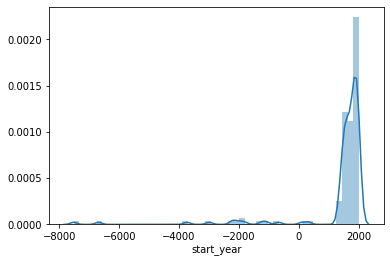

In [48]:
sns.distplot(villarrica['start_year'])

In [49]:
villarrica=villarrica.loc[(villarrica['start_year']>=1929) & (villarrica['start_year']<=2010)]

In [50]:
villarrica.shape

(32, 15)

In [51]:
villarrica=villarrica.loc[~(villarrica['eruption_category']=='Discredited Eruption')]

In [52]:
villarrica['start_day']=villarrica['start_day'].apply(lambda x: x+1 if x==0 else x)

In [53]:
villarrica['start_month']=villarrica['start_month'].apply(lambda x: x+1 if x==0 else x)

In [54]:
villarrica

,volcano_number,volcano_name,eruption_number,eruption_category,area_of_activity,vei,start_year,start_month,start_day,evidence_method_dating,end_year,end_month,end_day,latitude,longitude
384,357120,Villarrica,12184,Confirmed Eruption,NaN,1.0,2009.0,11.0,22.0,Historical Observations,2012.0,4.0,20.0,-39.42,-71.93
413,357120,Villarrica,12183,Confirmed Eruption,NaN,1.0,2009.0,1.0,29.0,Historical Observations,2009.0,3.0,24.0,-39.42,-71.93
430,357120,Villarrica,12182,Confirmed Eruption,NaN,1.0,2008.0,10.0,26.0,Historical Observations,NaN,NaN,NaN,-39.42,-71.93
628,357120,Villarrica,12181,Confirmed Eruption,NaN,1.0,2004.0,8.0,5.0,Historical Observations,2007.0,12.0,24.0,-39.42,-71.93
686,357120,Villarrica,12180,Confirmed Eruption,NaN,1.0,2003.0,5.0,23.0,Historical Observations,2004.0,3.0,25.0,-39.42,-71.93
920,357120,Villarrica,12179,Confirmed Eruption,NaN,1.0,1998.0,2.0,24.0,Historical Observations,2002.0,6.0,16.0,-39.42,-71.93
969,357120,Villarrica,12178,Confirmed Eruption,NaN,1.0,1996.0,9.0,14.0,Historical Observations,1997.0,8.0,16.0,-39.42,-71.93
996,357120,Villarrica,12174,Confirmed Eruption,NaN,1.0,1996.0,1.0,16.0,Historical Observations,NaN,NaN,NaN,-39.42,-71.93
1028,357120,Villarrica,12173,Confirmed Eruption,NaN,1.0,1995.0,4.0,15.0,Historical Observations,1995.0,6.0,2.0,-39.42,-71.93
1048,357120,Villarrica,12172,Confirmed Eruption,NaN,1.0,1994.0,9.0,26.0,Historical Observations,1994.0,12.0,30.0,-39.42,-71.93


In [55]:
villarrica['date']=villarrica['start_day'].astype(int).astype(str)+'/'+villarrica['start_month'].astype(int).astype(str)+'/'+villarrica['start_year'].astype(int).astype(str)

In [56]:
villarrica['date']=pd.to_datetime(villarrica['date'],format="%d/%m/%Y")

In [57]:
villarrica=villarrica[['volcano_number','volcano_name','eruption_number','eruption_category','vei',
                       'start_year','start_month','start_day','latitude','longitude','date']]

In [58]:
villarrica.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 384 to 3429
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   volcano_number     32 non-null     int64         
 1   volcano_name       32 non-null     object        
 2   eruption_number    32 non-null     int64         
 3   eruption_category  32 non-null     object        
 4   vei                31 non-null     float64       
 5   start_year         32 non-null     float64       
 6   start_month        32 non-null     float64       
 7   start_day          32 non-null     float64       
 8   latitude           32 non-null     float64       
 9   longitude          32 non-null     float64       
 10  date               32 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 3.0+ KB


# Exporting data

In [59]:
villarrica.to_csv('./VillarricaEruptions.csv',index=False)

In [60]:
villarrica_earthquakes.to_csv('./VillarricaEarthquakes.csv',index=False)